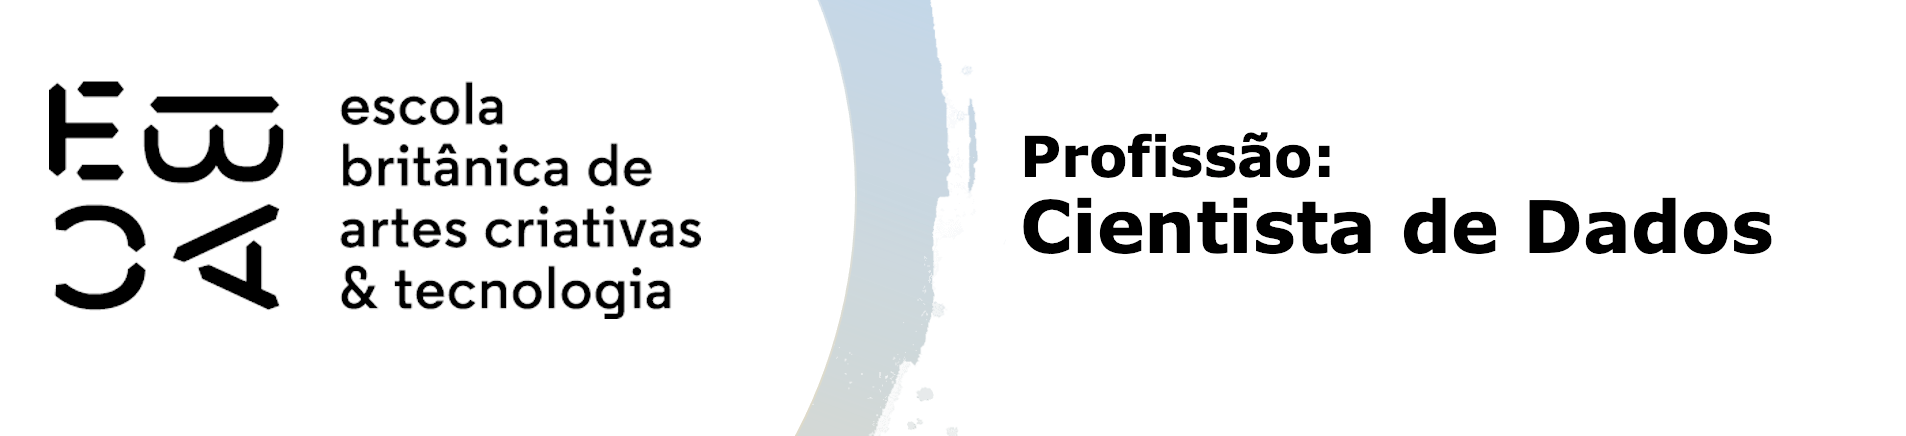

# Métodos hierárquicos de agrupamento - Tarefa

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [5]:
# Carregamento de dados
peng = sns.load_dataset('penguins')
peng.index.name='id'

# Seleção das variaveis quantitativas e eliminação dos valores faltantes
peng_num = peng.select_dtypes(include='number').dropna()

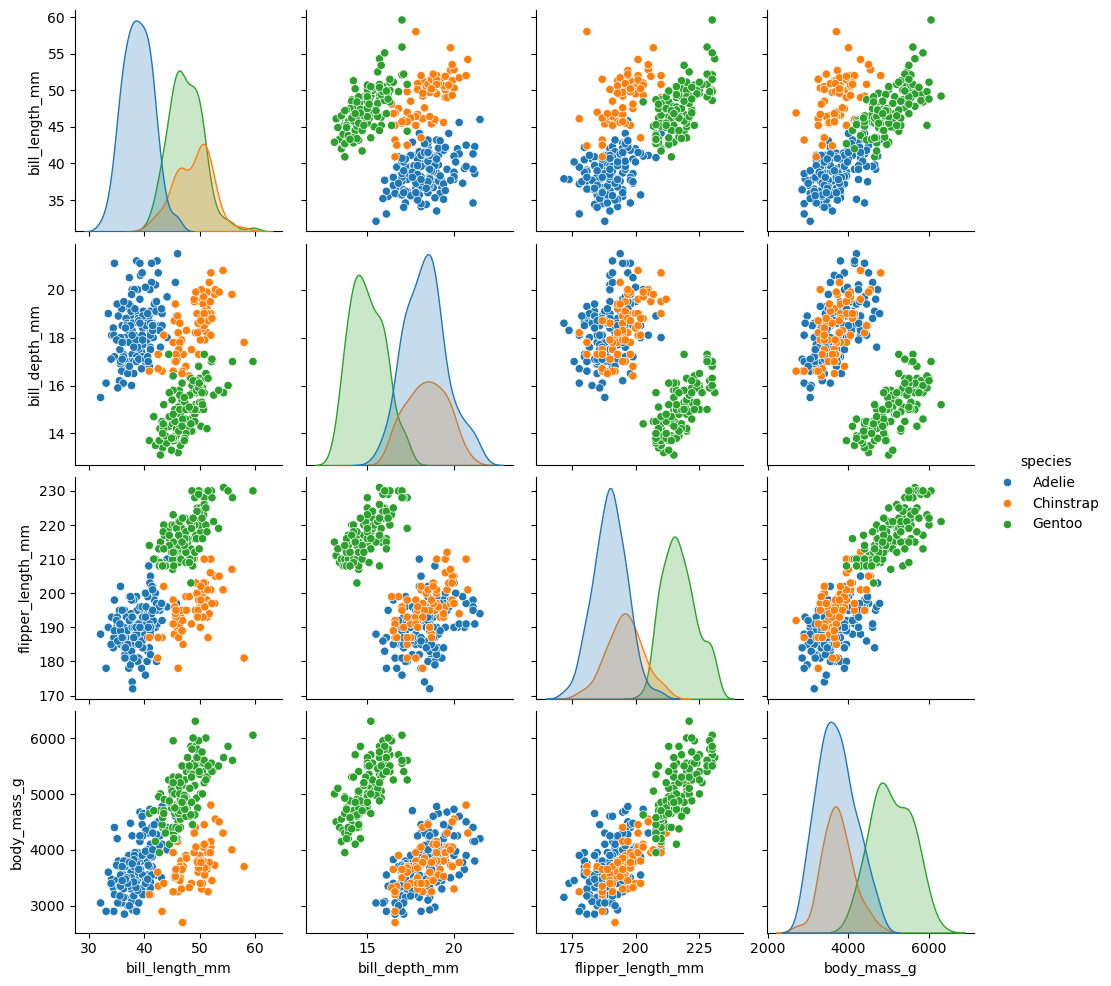

In [6]:
# Visualizaçao dos dados
sns.pairplot(data=peng, hue="species")

In [7]:
#Padronização das variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [8]:
# Agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage='complete',
                              distance_threshold= None,
                               n_clusters=3)
# Treino do algoritmo
clus.fit(peng_pad)                        

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [9]:
# Rótulos na base de treinamento utilizando o atributo labels_
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [10]:
# Junção da variavel 'grupo' com o metodo left join usando como chave o index da base original
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


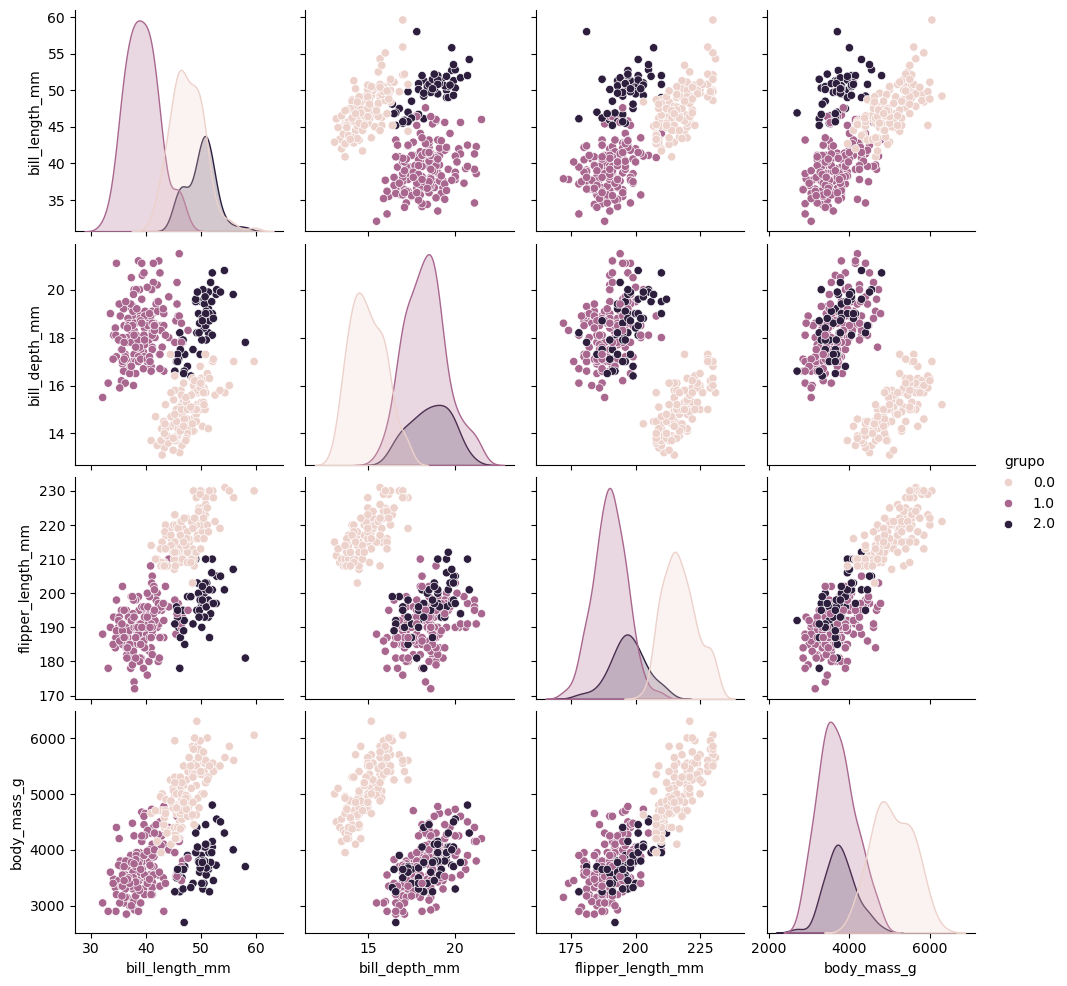

In [11]:
# Visualização dos grupos
sns.pairplot(data=peng, hue='grupo')

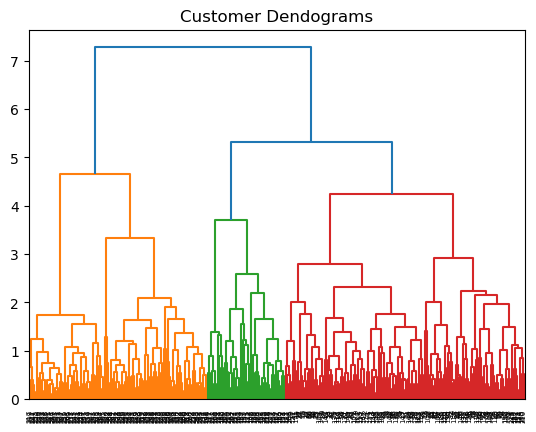

In [12]:
# Dendograma
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [14]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


**Grupo 0**: Esse grupo contém apenas pinguins Gentoo.

**Grupo 1**: Esse grupo tem a maior quantidade de pinguins e é composto principalmente por Adelie (151) e uma pequena quantidade de Chinstrap (14).

**Grupo 2**: Esse grupo contém apenas pinguins Chinstrap, e uma quantidade razoável (54).

In [16]:
peng.groupby('grupo')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg(['mean'])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
,mean,mean,mean,mean
grupo,,,,
0.0,47.504878,14.982114,217.186992,5076.016260
1.0,39.283030,18.304242,190.048485,3688.181818
2.0,49.935185,18.568519,197.055556,3779.629630


**Interpretação**
---
- **Grupo 0** (Gentoo):
    - Têm o maior comprimento de bico **(bill_length_mm)**
    - Nadadeiras **(flipper_length_mm)** mais compridas
    - São os pinguins mais pesados **(body_mass_g)**
---
- **Grupo 1** (Adelie + alguns Chinstrap):
    - Pinguins Adelie são menores e mais leves **(body_mass_g)**
    - Bico mais curto **(bill_length_mm)** e mais profundo **(bill_depth_mm)**
    - Nadadeiras menores **(flipper_length_mm)**
---
- **Grupo 2** (Chinstrap):
    - Bico longo (quase como Gentoo) mas mais fino **(bill_depth_mm)**
    - Tamanho intermediário (maior que Adelie, menor que Gentoo).
    - Massa corporal intermediária **(body_mass_g)**


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [19]:
# Agrupamento de 5 grupos
clus5 = AgglomerativeClustering(linkage='complete',
                              distance_threshold= None,
                               n_clusters=5)
# Treino do algoritmo
clus5.fit(peng_pad)                        

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [20]:
peng_num['grupo'] = clus5.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,4
1,39.5,17.4,186.0,3800.0,4
2,40.3,18.0,195.0,3250.0,4
4,36.7,19.3,193.0,3450.0,4
5,39.3,20.6,190.0,3650.0,2


In [21]:
peng =  peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_x,grupo_y
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,4.0


In [22]:
pd.crosstab(peng['species'], peng['grupo_y'])

grupo_y,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


In [23]:
# Tabela cruzada (species x sex x grupo_y)
tabela = pd.crosstab(index=[peng['species'], peng['sex']],
                     columns=peng['grupo_y'],
                     margins=True)

# Mostrar a tabela
print(tabela)


grupo_y           0.0  1.0  2.0  3.0  4.0  All
species   sex                                 
Adelie    Female    0    0    4    0   69   73
          Male      0    0   55    0   18   73
Chinstrap Female   20    0    9    0    5   34
          Male     34    0    0    0    0   34
Gentoo    Female    0    9    0   49    0   58
          Male      0   61    0    0    0   61
All                54   70   68   49   92  333


**Interpretação**
- **Grupo 0**:
    - Composto exclusivamente pela espécie Chinstrap.
    - Distribuição por sexo:
        - 20 fêmeas
        - 34 machos
    - Esse grupo representa uma separação clara da espécie Chinstrap, indicando que o agrupamento conseguiu identificar suas características específicas.

- **Grupo 1**:
    - Formado maioria por pinguins da espécie Gentoo, especialmente machos.
    - Distribuição por sexo e espécie:
        - Gentoo: 61 machos e 9 fêmeas
    - Esse grupo parece capturar características dos machos Gentoo, que são maiores e têm nadadeiras mais longas.

- **Grupo 2**:
    - Composto principalmente por pinguins da espécie Adelie, com forte predominância de machos.
    - Distribuição por sexo e espécie:
        - Adelie: 55 machos e 4 fêmeas
        - Chinstrap: 9 fêmeas
    - Esse grupo mistura espécies, mas é dominado por Adelie machos, sugerindo que machos dessa espécie possuem características físicas distintas que os separam nesse agrupamento.


- **Grupo 3**:
    - Composto exclusivamente por pinguins da espécie Gentoo, todos do sexo feminino.
    - Distribuição:
        - Gentoo: 49 fêmeas
    - Esse grupo mostra uma clara separação entre machos e fêmeas da espécie Gentoo, o que reforça que o algoritmo conseguiu capturar diferenças entre os sexos dentro da mesma espécie.

- **Grupo 4**:
    - Formado principalmente por pinguins da espécie Adelie, com maior presença de fêmeas.
    - Distribuição por sexo e espécie:
        - Adelie: 69 fêmeas e 18 machos
        - Chinstrap: 5 fêmeas
    - Esse grupo também mistura espécies, mas destaca a presença de Adelie fêmeas, que podem ter características morfológicas (como tamanho e proporções corporais) que as diferenciam de machos e de outras espécies.

---
**Observações finais**

O agrupamento hierárquico conseguiu capturar padrões naturais relevantes, como:
- Separação por espécie (Gentoo e Chinstrap formam grupos mais "puros").
- Separação por sexo (em algumas espécies, fêmeas e machos formam grupos distintos, especialmente em Gentoo).
- Diferenças morfológicas e de tamanho parecem ter sido usadas pelo algoritmo para formar os grupos, já que machos tendem a ser maiores que fêmeas em algumas espécies.
- Além disso, a presença de grupos mistos (como nos grupos 2 e 4) sugere que existem características compartilhadas entre espécies diferentes, especialmente entre Adelie e Chinstrap, que podem ter medidas corporais similares.